In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import logistic_regression

In [2]:
df = pd.read_csv('data.csv')
lista = [ 'Class']
df[lista] = df[lista].apply(lambda x:x.map({'Churned': 1, "Active": 0}))
df.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Class
0,1914,1592.7200,23.26,2.5,11.6113,25523,99000,0,0,0,0,1,0,1
1,2073,1404.1496,174.45,27.5,2531.7246,14584,77299,0,0,1,0,0,1,1
2,3139,85.5504,14.34,5.0,29133.0557,477,4194,0,0,0,0,0,0,1
3,139,2315.2292,19.25,52.5,267441.2813,50316,52400,0,0,0,0,0,1,0
4,143,973.9664,21.86,22.5,920871.0674,4032,15476,1,1,1,0,0,1,0


In [3]:
# check for missing values
print(df.shape)
df.isnull().sum()

(1721, 14)


network_age             0
Aggregate_Total_Rev     0
Aggregate_SMS_Rev       0
Aggregate_Data_Rev      0
Aggregate_Data_Vol      0
Aggregate_ONNET_REV     0
Aggregate_OFFNET_REV    0
aug_user_type_3G        0
sep_user_type_3G        0
aug_fav_a_mobilink      0
aug_fav_a_ufone         0
sep_fav_a_mobilink      0
sep_fav_a_ufone         0
Class                   0
dtype: int64

In [4]:
df.describe()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,aug_user_type_3G,sep_user_type_3G,aug_fav_a_mobilink,aug_fav_a_ufone,sep_fav_a_mobilink,sep_fav_a_ufone,Class
count,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.00000,1721.000000,1721.000000,1721.000000
mean,1521.499709,927.160921,31.256235,60.961058,2.739901e+06,7320.837885,16576.438117,0.546775,0.561302,0.144102,0.22545,0.071470,0.614759,0.504358
std,1289.607035,1191.604122,56.410040,263.700966,8.918618e+06,16062.999613,34349.394084,0.497952,0.496372,0.351295,0.41800,0.257683,0.486794,0.500126
min,-8.000000,4.910000,0.000000,0.000000,5.860000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,382.000000,256.690000,3.500000,1.250000,2.381316e+03,120.000000,1434.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1244.000000,639.970000,14.940000,13.750000,1.714807e+05,1949.000000,5055.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000
75%,2299.000000,1235.290000,34.330000,53.750000,1.511060e+06,7852.000000,16222.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,5451.000000,24438.830000,665.000000,8295.000000,1.550312e+08,381174.000000,431440.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
df = df[df['network_age']>=0]

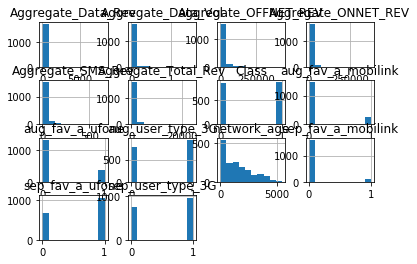

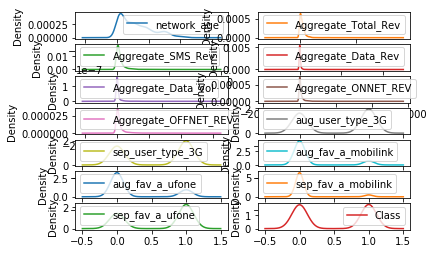

In [6]:
data = df
data.hist()#histograms - biểu đồ
plt.show()
data.plot(kind='density', subplots=True, layout=(7,2), sharex=False) #Density Plots
plt.show()
#data.plot(kind='box', subplots=True, layout=(7,2), sharex=False, sharey=False) #Box and Whisker Plots
#plt.show()

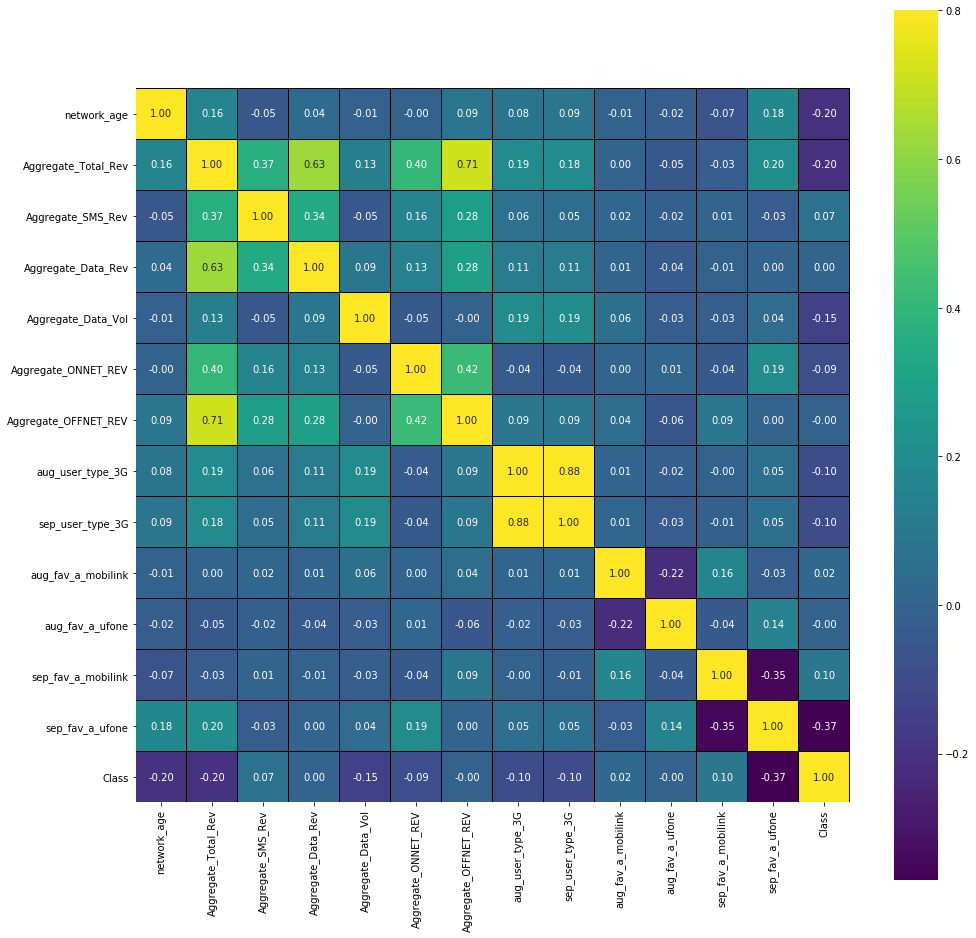

In [8]:
colormap = plt.cm.viridis
cor = df.corr()
#cor = cor.drop(['Class'],axis=1).drop(['Class'],axis=0)
plt.figure(figsize=(16,16))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='black',linewidths=0.1)

In [9]:
Y = df['Class']
X = df.drop(["Class"],axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3,random_state=42)

In [11]:
model = logistic_regression.model(X_train, Y_train, X_test, Y_test, number_of_iterations = 5000, learning_rate = 1, print_loss = True)

Loss after 0: 0.6931471805599451
Loss after 500: 0.5988162988838998
Loss after 1000: 0.5936273971856735
Loss after 1500: 0.5899025456628203
Loss after 2000: 0.5870180583623209
Loss after 2500: 0.584670204175561
Loss after 3000: 0.5826906674227037
Loss after 3500: 0.5809773073932557
Loss after 4000: 0.5794639730135928
Loss after 4500: 0.5781057273621795


In [12]:
print('Trọng số w: ', model['w'], '\nHệ số bias b:', model['b'])
report =  metrics.classification_report(Y_test,model['y_prediction_test'],digits=4) 

print(report)
matrix = metrics.confusion_matrix(Y_test,model['y_prediction_test'])
print(matrix)

Trọng số w:  [-1.22033761 -8.9590996   1.68692549  2.31404576 -5.12769793 -1.06126717
  3.65630403  0.11222044 -0.20569168  0.12933103  0.24385665 -0.22789931
 -1.47943363] 
Hệ số bias b: 1.46188338200549
              precision    recall  f1-score   support

           0     0.6634    0.8039    0.7270       255
           1     0.7573    0.6000    0.6695       260

    accuracy                         0.7010       515
   macro avg     0.7104    0.7020    0.6982       515
weighted avg     0.7108    0.7010    0.6980       515

[[205  50]
 [104 156]]


In [13]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
print('Trọng số w: ', model1.coef_, '\nHệ số bias b:', model1.intercept_)
y_pred = model1.predict(X_test)
report =  metrics.classification_report(Y_test,y_pred,digits=4) 

print(report)
matrix = metrics.confusion_matrix(Y_test,y_pred)
print(matrix)

Trọng số w:  [[-1.16724767 -2.64915176  0.86039993  0.36340651 -2.09903517 -0.40807452
   0.98617756  0.04072826 -0.23364974  0.14378358  0.25209171 -0.14765612
  -1.54529972]] 
Hệ số bias b: [1.39706734]
              precision    recall  f1-score   support

           0     0.6484    0.7882    0.7115       255
           1     0.7366    0.5808    0.6495       260

    accuracy                         0.6835       515
   macro avg     0.6925    0.6845    0.6805       515
weighted avg     0.6929    0.6835    0.6802       515

[[201  54]
 [109 151]]
